In [69]:
import pandas as pd
import numpy as np
import string
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import FreqDist
from sklearn.manifold import MDS
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

## Task B

In [70]:
# brand model switch
brand_model_map = pd.read_csv('car models and brands (3).csv')

brand_model_map['Brand'] = brand_model_map['Brand'].astype('string')
brand_model_map['Model'] = brand_model_map['Model'].astype('string')

brand_model_map['Model'].apply(str.lower)
brand_model_map['Brand'].apply(str.lower)

0      acura
1      acura
2      acura
3      acura
4      acura
       ...  
525    volvo
526    volvo
527    volvo
528    volvo
529    volvo
Name: Brand, Length: 530, dtype: object

In [71]:
data = pd.read_csv('edmunds_forum.csv')
data['comments'] = data['comments'].str[1:]

In [72]:
def punctuation_extermination(s):
    o = str.maketrans('', '', string.punctuation)
    return str(s).translate(o)

data['comments'] = data['comments'].apply(punctuation_extermination)

# # Turns all comments to lowercase
# count = 0
# for comment in data["comments"]:
#     temp = ""
#     for word in comment:
#         word = str(word).lower()
#         temp += word
#     data["comments"][count] = temp
#     count += 1

In [73]:
corpus = ""
for l in data['comments']:
    l = str(l).lower()
    corpus += l


corpus = corpus.split()
corpus_without_stop = [word for word in corpus if word not in stopwords.words("english")]
# corpus_without_stop[:500]

In [74]:
set(brand_model_map["Model"])
modellookup = brand_model_map.set_index("Model").to_dict()["Brand"]

In [75]:
def mbswitch(x):
    t = x.split()
    for word in t:
        if word in modellookup:
            x = x.replace(word, modellookup[word])
    return x

corpus_without_stop = [x.lower() for x in corpus_without_stop]
corpus_swapped = [mbswitch(x) for x in corpus_without_stop]
data['comments'] = data['comments'].apply(lambda i: i.lower())
data['comments'] = data['comments'].apply(lambda i: (mbswitch(i)))

In [76]:
import re
brandlist = [brand_model_map["Brand"]]

In [77]:
freq_dict = {}
for word in corpus_swapped:
    if word not in freq_dict.keys():
        freq_dict[word] = 1
    elif word in freq_dict.keys():
        freq_dict[word] += 1
    else:
        print('error')

In [83]:
brand_strings = (brand_model_map['Brand'].values)

brand_strings = set(brand_strings)
car_dict = {}
for package in brand_strings:
    if package in freq_dict.keys():
        car_dict[package] = freq_dict[package]

In [84]:
# Removes cars that return 0 freq value
removeList = ['car', 'problem', 'seat', 'sedan', 'volkwagen']
for key in car_dict.keys():
    if car_dict[key] == 0:
        removeList.append(key)

for car in removeList:
    del car_dict[car]

car_dict

{'pontiac': 177,
 'bmw': 6527,
 'chevrolet': 279,
 'cadillac': 420,
 'audi': 2045,
 'mercedes': 87,
 'chrysler': 153,
 'mazda': 267,
 'saturn': 43,
 'ford': 432,
 'nissan': 797,
 'volkswagen': 450,
 'dodge': 170,
 'mercury': 19,
 'subaru': 476,
 'hyundai': 357,
 'suzuki': 30,
 'acura': 1542,
 'volvo': 649,
 'mitsubishi': 52,
 'lincoln': 429,
 'buick': 194,
 'honda': 1271,
 'hyndai kia': 2,
 'kia.': 1,
 'mercedes-benz': 384,
 'toyota': 961,
 'kia': 39,
 'infiniti': 1046}

In [106]:
top10BrandsDict = dict(sorted(car_dict.items(), key=lambda item: item[1], reverse= True)[:10])

top10Brands = list(top10BrandsDict.keys())

top10Brands

['bmw',
 'audi',
 'acura',
 'honda',
 'infiniti',
 'toyota',
 'nissan',
 'volvo',
 'subaru',
 'volkswagen']

## Task C

In [103]:
lift_dict = pd.DataFrame(index= top10Brands, columns= top10Brands)
total_shape = data.shape[0]
for i in range(len(top10Brands)):
    for j in range(len(top10Brands)):
        brand_1 = top10Brands[i]
        brand_2 = top10Brands[j]
        count_1 = 0
        count_2 = 0
        count_3 = 0
        
        for txt in data.comments.values:
            if brand_1 in txt and brand_2 in txt:
                count_3 = count_3 + 1
            elif brand_1 in txt and brand_2 not in txt:
                count_1 = count_1 + 1 
            elif brand_1 not in txt and brand_2 in txt:
                count_2 = count_2 + 1
        
        if(brand_1==brand_2):
            lift_dict[brand_1][brand_2] = 0

        else:
            pa = count_1/total_shape
            pb = count_2/total_shape
            pab = count_3/total_shape
            ans = (pa*pb)/pab
            
            lift_dict[brand_1][brand_2] = round(1/ans,3)

In [104]:
# import math
# if math.isnan(lift_dict):
#     lift_dict = 0


mdslifts = lift_dict
mdslifts.reset_index(drop=True, inplace=True)
mds = MDS(random_state=0)
mdslifts = mds.fit_transform(mdslifts)
mdslifts

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_mds.py:512: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


array([[ 0.17032106,  0.72093278],
       [ 3.32362636, -5.702624  ],
       [ 2.17736704,  5.85649958],
       [-3.98796643, -6.38343955],
       [-6.2983281 , -1.88169982],
       [ 5.35465243,  4.17700652],
       [ 5.82494468, -1.31963403],
       [-4.61846294,  2.26301726],
       [ 0.74449119, -2.39926924],
       [-2.69064528,  4.6692105 ]])

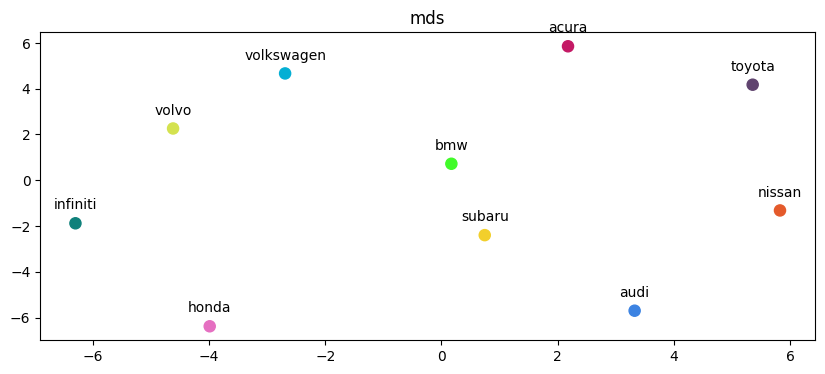

In [105]:
colors = ['#41FB29', '#3C83E2', '#C41965', '#E56FC1', '#0F817B', '#60446F', '#E45A2B', '#D4E24F', '#F2CF2B', '#04AFD4']

size = [64, 64, 64, 64, 64, 64, 64, 64, 64, 64] ##41FB29
fig = plt.figure(2, (10,4))
plt.scatter(mdslifts[:,0], mdslifts[:,1], s=size, c=colors)
count = 0
for x, y in zip(mdslifts[:,0], mdslifts[:,1]):
    label = "{0}".format(top10Brands[count])
    count += 1
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha=('center') # horizontal alignment
    )
plt.title('mds')
plt.show()